
# Smart energy forecasting  
## Notebook 1 – Data loading & cleaning  

This notebook performs the first step of the *Smart Energy Forecasting* project:  
**loading and cleaning the raw electricity demand data for France** from the [Open Power System Data (OPSD)](https://data.open-power-system-data.org/time_series/).  

### Objectives
- Load raw OPSD dataset (`time_series_60min_singleindex.csv`)  
- Extract French electricity load (`FR_load_actual_entsoe_transparency`)  
- Convert timestamps to local timezone (`Europe/Paris`)  
- Handle missing values and verify data consistency  
- Export a cleaned dataset (`energy_france.csv`) for later use  

---

### About this dataset
The Open Power System Data (OPSD) project provides open datasets on European power systems.  
We use the *time_series_60min_singleindex* dataset, which contains hourly electricity load, generation, and weather data for multiple countries.  

- Source: [OPSD Time Series Data](https://data.open-power-system-data.org/time_series/)  
- Frequency: Hourly (`60min`)  
- Period: 2015–2020  
- Columns used: UTC timestamp and France actual load (ENTSO-E Transparency)  

---


In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Define input and output paths
SOURCE_PATH = Path("../data/time_series_60min_singleindex.csv")

if not SOURCE_PATH.exists():
    raise FileNotFoundError(
        f"File not found: {SOURCE_PATH}\n"
        "Download it from: "
        "https://data.open-power-system-data.org/time_series/latest/time_series_60min_singleindex.csv\n"
        "and place it inside the 'data/' folder."
    )

In [4]:
# Load the OPSD dataset
print("Loading full dataset...")
df = pd.read_csv(SOURCE_PATH, parse_dates=["utc_timestamp"])

print("Raw data loaded successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Loading full dataset...
Raw data loaded successfully
Shape: (50401, 300)
Columns: ['utc_timestamp', 'cet_cest_timestamp', 'AT_load_actual_entsoe_transparency', 'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead', 'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual', 'BE_load_actual_entsoe_transparency', 'BE_load_forecast_entsoe_transparency', 'BE_solar_generation_actual', 'BE_wind_generation_actual', 'BE_wind_offshore_generation_actual', 'BE_wind_onshore_generation_actual', 'BG_load_actual_entsoe_transparency', 'BG_load_forecast_entsoe_transparency', 'BG_solar_generation_actual', 'BG_wind_onshore_generation_actual', 'CH_load_actual_entsoe_transparency', 'CH_load_forecast_entsoe_transparency', 'CH_solar_capacity', 'CH_solar_generation_actual', 'CH_wind_onshore_capacity', 'CH_wind_onshore_generation_actual', 'CY_load_actual_entsoe_transparency', 'CY_load_forecast_entsoe_transparency', 'CY_wind_onshore_generation_actual', 'CZ_load_actual_entsoe_transparency', 'CZ_loa

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [5]:
# Keep only France electricity load data
if "FR_load_actual_entsoe_transparency" not in df.columns:
    raise KeyError("Column 'FR_load_actual_entsoe_transparency' not found in OPSD dataset.")

df_fr = df[["utc_timestamp", "FR_load_actual_entsoe_transparency"]].rename(
    columns={
        "utc_timestamp": "datetime",
        "FR_load_actual_entsoe_transparency": "load_mw"
    }
)

print("Subset for France created")
df_fr.head()


Subset for France created


,datetime,load_mw
0,2014-12-31 23:00:00+00:00,NaN
1,2015-01-01 00:00:00+00:00,NaN
2,2015-01-01 01:00:00+00:00,69773.0
3,2015-01-01 02:00:00+00:00,66417.0
4,2015-01-01 03:00:00+00:00,64182.0


In [6]:
# Handle timezone and missing values
df_fr = df_fr.dropna().reset_index(drop=True)
df_fr["datetime"] = df_fr["datetime"].dt.tz_convert("Europe/Paris")

print("Timezone adjusted and missing values dropped")
print(df_fr.info())

Timezone adjusted and missing values dropped
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50357 entries, 0 to 50356
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype                       
---  ------    --------------  -----                       
 0   datetime  50357 non-null  datetime64[ns, Europe/Paris]
 1   load_mw   50357 non-null  float64                     
dtypes: datetime64[ns, Europe/Paris](1), float64(1)
memory usage: 787.0 KB
None


In [7]:

# Basic sanity checks

print("Date range:", df_fr["datetime"].min(), "->", df_fr["datetime"].max())
print("Number of rows:", len(df_fr))
print("Missing values:", df_fr.isna().sum().sum())
print("Load (MW) - min:", df_fr["load_mw"].min(), "| max:", df_fr["load_mw"].max())


Date range: 2015-01-01 02:00:00+01:00 -> 2020-10-01 00:00:00+02:00
Number of rows: 50357
Missing values: 0
Load (MW) - min: 29398.0 | max: 158000.0


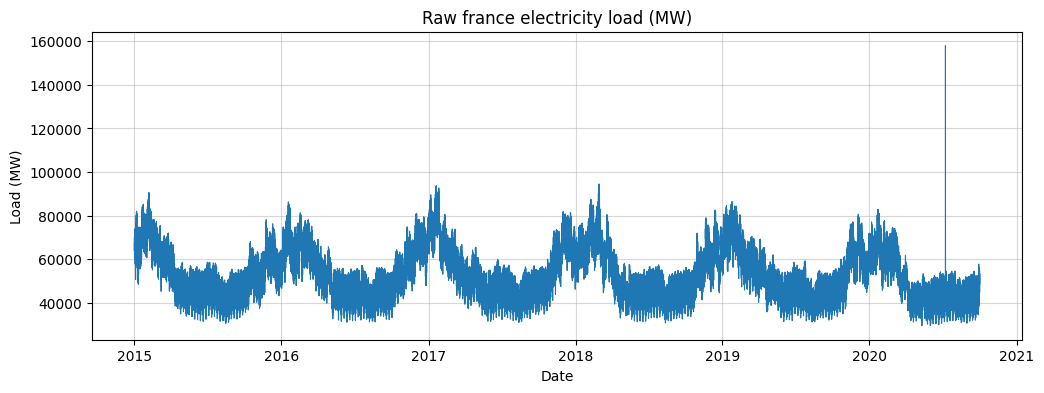

In [9]:

# Visual sanity check

plt.figure(figsize=(12, 4))
plt.plot(df_fr["datetime"], df_fr["load_mw"], linewidth=0.8)
plt.title("Raw france electricity load (MW)")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.grid(alpha=0.5)
plt.show()


In [16]:
# Save cleaned dataset

df_fr.to_csv("../data/energy_france.csv", index=False)
print("Cleaned dataset saved to 'data/energy_france.csv'")

Cleaned dataset saved to 'data/energy_france.csv'
